# Unsupervised Learning via Linear Algebra

In the previous chapters, our learning paradigm relied on **supervision**: we were provided with input–output pairs $(X, Y)$, and the goal was to *learn* a function that maps each input to the correct output. We developed models such as linear regression, logistic regression and simple neural networks, and trained them using iterative **gradient-based optimization** methods like *SGD* and *Adam*. In those settings, the loss function was explicitly defined by comparing predictions with ground-truth labels, and learning meant progressively reducing this discrepancy.

We now turn to a different and equally fundamental perspective: **unsupervised learning**. In this setting, we are given only the data $X$, without any accompanying target values $Y$. The task is to discover **structure** hidden in the data such as patterns, groupings, low-dimensional representations, or meaningful features that are not explicitly provided. Instead of learning "from answers", we now try to learn **from the data itself**.

Unsupervised learning plays a crucial role in modern machine learning and data analysis. Two of its most impactful areas are:

- **Dimensionality reduction / data compression**: real-world datasets often live in high-dimensional spaces, but much of that dimensionality is redundant. By finding compact, informative representations, we can improve storage, visualization, and even performance of supervised models.  
  *Example: reducing the number of features needed to describe images, sound recordings, or text embeddings.*

- **Clustering**: identifying groups or categories within data *without* labels.  
  *Example: segmenting clients by purchasing behavior, grouping similar images without annotations, recognizing patterns in biological or sensor data.*

In contrast to neural network training, where gradients and learning rates play a central role, many powerful unsupervised methods are based entirely on **linear algebra**. A particularly elegant tool in this direction is the **Singular Value Decomposition (SVD)**, a fundamental matrix factorization technique that reveals geometric and statistical structure in the data. With SVD, we can:

- discover the principal directions of variation in the data,
- build optimal low-rank approximations (for compression),
- and apply those ideas to perform clustering based on latent structure.

In this chapter, we will study how unsupervised learning can be achieved **without gradients**, using only matrix decompositions and linear algebraic reasoning. You will see that, although philosophically different from the supervised techniques studied so far, these methods share the same motivation: extract meaningful information from data. The only difference, compared to supervised learning, is that now we aim to do that **without ever knowing the "correct answers" in advance**.

We begin by introducing SVD, understanding how it relates to variance maximization and optimal projections, and then show how it can be used for dimensionality reduction and clustering.

## The Singular Value Decomposition (SVD)
In Data Analysis, it is often required to compress the data, either to make it more manageable or to be able to visualize the most important features, reducing redundancy. The two tasks, usually named **data compression** and **dimensionality reduction**, are mathematically equivalent and closely related to the concept of **Singular Value Decomposition (SVD)** of a matrix.

Recall that:
> An invertible matrix $A \in \mathbb{R}^{n \times n}$ is said to be **orthogonal** if $A^T A = I$ or, equivalently, $A^T = A^{-1}$. 

Now, consider a given matrix $A \in \mathbb{R}^{m \times n}$. It can be proved that it can be **always** factorized into the product of three matrices,

$$
A = U \Sigma V^T
$$

where $U \in \mathbb{R}^{m \times m}$ and $V \in \mathbb{R}^{n \times n}$ are orthogonal matrices, while $\Sigma \in \mathbb{R}^{m \times n}$ is a rectangular matrix which is non-zero only on the diagonal. Such decomposition is named **Singular Value Decomposition (SVD)** of $A$.

Of particular interest in our analysis are the values on the diagonal of $\Sigma$, named **singular values** of $A$, and usually denoted as $\sigma_1, \dots, \sigma_{\min \{ m, n \}}$. In particular, it is known that the singular values:

- are always greater or equal to 0, i.e. $\sigma_i \geq 0$, $\forall i$;
- are ordered in descending order, i.e. $\sigma_1 \geq \sigma_2 \geq \dots \geq 0$;
- can be used to determine the rank of $A$, since it is equal to the number of singular values strictly greater than zero, i.e. if $\sigma_1 \geq \sigma_2 \geq \dots \sigma_r > 0$ and $\sigma_{r+1} = 0$ for some index $r$, then $r = rk(A)$.

A useful properties of the SVD of $A$ is that it can be used to compress the informations contained in $A$ itself. Indeed, note that the SVD decomposition allows to rewrite $A$ as the sum of simple matrices, i.e.

$$
A = U \Sigma V^T = \sum_{i=1}^r \sigma_i u_i v_i^T
$$

where $u_i$ and $v_i$ are the columns of $U$ and $V$, respectively. Each term $u_i v_i^T$ is a rank-1 matrix named **dyad**, and the $i$-th singular value $\sigma_i$ represent the importance of the $i$-th dyad in the construction of $A$. In particular, the SVD decomposition allows to deconstruct $A$ into the sum of matrices with decreasing information content. 

The SVD decomposition can be used to compress the matrix $A$ by considering its $k$-rank approximation $A_k$, defined as

$$
A_k = \sum_{i=1}^k \sigma_i u_i v_i^T.
$$

```{note}
The $k$-rank approximation $A_k$ of $A$ is simply obtained by stopping the summation defining $A$ through dyads at term $k \leq r$. Whenever $k = r$, clearly $A_k = A$.
```

It can also be shown that the $k$-rank approximation of $A$ is the $k$-rank matrix that minimizes the distance (expressed in Frobenius norm) from $A$, i.e.

$$
A_k = \arg\min_{M: rk(M) = k} || M - A ||_F.
$$

### SVD of a Matrix in Python
The SVD can be easily computed in Python using functions from the `numpy` package.

In [34]:
# Importing numpy
import numpy as np

# Consider an example matrix
A = np.array(
    [
        [-1, -2, 0, 1, -2, -3],
        [-1, -2, -3, -2, 0, -3],
        [-1, -3, 1, 3, 2, -4],
        [2, 1, -1, 0, -2, 3],
        [0, -3, -1, 2, -1, -3],
        [1, -3, 2, 6, 0, -2],
        [-3, 1, 0, -4, 2, -2],
        [-2, 2, -2, -6, -2, 0],
        [-3, -1, 2, 0, 2, -4],
        [2, -2, 0, 4, -1, 0],
    ]
)

# Measure the shape of A: which is the maximum rank?
m, n = A.shape
print(f"The shape of A is: {(m, n)}.")

# Compute the SVD decomposition of A and check the shapes
U, s, VT = np.linalg.svd(A, full_matrices=True)
print(U.shape, s.shape, VT.shape)

# Define the full matrix S
S = np.zeros((m, n))
S[:n, :n] = np.diag(s)

The shape of A is: (10, 6).
(10, 10) (6,) (6, 6)


Here we computed the SVD of `A` through the function `np.linalg.svd()`, that takes as input a matrix and returns a triplet `U, s, VT`, representing the matrices $U$, $V^T$ and a **vectorized** version of $\Sigma$ that only contains the diagonal (to save memory!).

Note that, in some situations, it can be useful to compute the full matrix $\Sigma$, as we did at the bottom of the above code snippet. 

```{warning}
If the full matrix $\Sigma$ can be avoided, do not construct it explicitely.
```

> **Exercise:** Verify that the above algorithm works as expected, by proving that $ A \approx U \Sigma V^T \iff || A - U \Sigma V^T ||_2 \approx 0.$

> **Exercise:** Compute the $k$-rank approximation $A_k$ of $A$. Specifically, write a Python function that takes as input an integer $k \leq \min \{ m, n \}$ and computes the $k$-rank approximation $A_k = \sum_{i=1}^k \sigma_i u_i v_i^T$. Then, test it on a matrix of your preference and compute the approximation error in Frobenius norm, $\| A - A_k \|_F$.

### The numerical rank of $A$
In theory, the rank of a matrix is the number of non-zero singular values in its Singular Value Decomposition (SVD). However, in real-world data (and floating-point arithmetic), singular values rarely vanish exactly; instead, many become *very small* due to noise, correlations, or computational precision. The **numerical rank** of a matrix refers to the number of singular values that are significantly larger than zero according to a chosen tolerance. In practice, it represents the *effective dimensionality* of the matrix: how many directions in space defined by $A$ truly contain information. Small singular values are often associated with noise or redundant structure, while the dominant singular values capture meaningful patterns. Identifying the numerical rank is fundamental for tasks such as dimensionality reduction, compression, and noise filtering, as it tells us how many principal components we actually need to faithfully represent the dataset.

> **Exercise:** Compute the rank of $A$ by using the formula:
> $ rk(A) = r \text{ s.t. } \sigma_r > 0, \sigma_{r+1} = 0$,
> and compare it with the output of the built-in function in `numpy`.

## SVD for Image Compression
From a computational point of view, a grey-scale image is a **matrix** with shape `(height, width)`, such that the element in position $i, j$ contains the intensity of the pixel in the corresponding position. An RGB image is a triplet of matrices such that in position $i, j$, each of the three matrices represents the amount of Red, Green and Blue in the corresponding pixel.

To work with images, we consider the `skimage.data` submodule:

In [35]:
import skimage

# Loading the "cameraman" image
x = skimage.data.camera()

# Printing its shape
print(f"Shape of the image: {x.shape}.")

Shape of the image: (512, 512).


To visualize a matrix as an image, it can be used the `plt.imshow()` function from the `matplotlib.pyplot` module. If the image is a grey-scale image (as it is the case for the `camera` image we are considering), it is required to set the `cmap='gray'` option to visualize it as a grey-scale image.

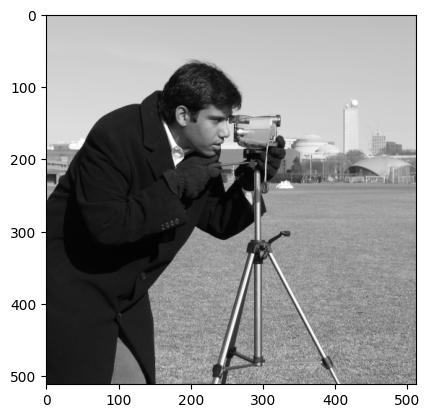

In [36]:
# Visualize the image
import matplotlib.pyplot as plt

plt.imshow(x, cmap="gray")
plt.show()

Besides the visualization, the image is still a matrix and all the techniques already studied for matrices can be used on images. In particular, the $k$-rank approximation can be used to compress it with minimal information loss.

We recall that the $k$-rank approximation $X_k$ of the image $X$ is defined as

$$
    X_k = \sum_{i=1}^k \sigma_i u_i v_i^T
$$

where each $\sigma_i$ is a scalar number, $u_i$ is an $m$-dimensional vector, while $v_i$ is an $n$-dimensional vector. As a consequence, the number of values required to memorize $X_k$ is $k(m + n + 1)$, while the number of values required to memorize the whole image $X$ is $mn$. As a consequence, the compression factor (i.e. the percentage of pixels we saved in memorizing $X_k$ instead of $X$) can be computed as:

$$
    c_k = 1 - \frac{k (m + n + 1)}{mn}.
$$

> **Exercise:** Using the function defined in the previous exercise, compute the $k$-rank approximation of the cameraman image $X$ for different values of $k$ and observe the behavior of each reconstruction. Also, compute and plot the compression factor $c_k$ for each value of $k$.

## Dimensionality Reduction with PCA

Working with data, it is common to have access to very high-dimensional unstructured informations (e.g. images, sounds, ...). To effectively work with them, it is necessary to find a way to project them into a low-dimensional space where data **semantically similar** is **close**. This approach is called **dimensionality reduction**.

For example, assume our data can be stored in an $N \times d$ array,

$$
    X = [ x^{(1)}; x^{(2)}; \dots x^{(N)} ] \in \mathbb{R}^{N \times d}
$$

where each datapoint $x^{(j)} \in \mathbb{R}^d$. The idea of dimensionality reduction techniques in ML is to find a projector operator $P: \mathbb{R}^d \to \mathbb{R}^k$, with $k \ll d$, such that in the projected space $P(x)$, images semantically similar are close together. If the points in a projected space forms isolated popoulations such that _inside_ of each popoulation the points are close, while the distance _between_ popoulations is large, we call them **clusters**. A clusering algorithm is an algorithm which is able to find clusters from high-dimensional data.

### Principal Component Analysis (PCA)
Principal Componenti Analyisis (PCA) is arguably the simplest yet effective technique to perform dimensionality reduction and clustering. It is an unsupervised algorithm, thus it does not require any label. The idea is the following: consider a dataset $X \in \mathbb{R}^{N \times d}$ of high-dimensional data and assume we want to project it into a low-dimensional space $\mathbb{R}^k$. Define:

$$
    Z = [z^{(1)}; z^{(2)}; \dots z^{(N)}] \in \mathbb{R}^{N \times k},
$$

the projected version of $X$. We want to find a matrix $P \in \mathbb{R}^{k \times d}$ such that $Z = XP^T$, with the constraint that in the projected space we want to keep as much information as possible from the original data $X$. 

You already studied that, when you want to project a matrix by keeping informations, a good idea is to use the Singular Value Decomposition (SVD) of it and, in particular, the Truncated SVD (TSVD). Let $X \in \mathbb{R}^{N \times d}$, then

$$
X = U \Sigma V^T
$$

is the SVD of $X$, where $U \in \mathbb{R}^{N \times N}$, $V \in \mathbb{R}^{d \times d}$ are orthogonal matrices ($U^T U = U U^T = I$ and $V V^T = V^T V = I$), while $\Sigma \in \mathbb{R}^{N \times d}$ is a diagonal matrix whose diagonal elements $\sigma_i$ are the singular values of $X$, in decreasing order ($\sigma_1 \geq \sigma_2 \geq \dots \geq \sigma_d$). Since the singular values represents the _quantity of informations_ contained in the corresponding singular vectors, keeping the first $k$ singular values and vectors can be the solution to our projection problem. Indeed, given $k < d$, we define the Truncated SVD of $X$ as

$$
X_k = U_k \Sigma_k V^T_k
$$

where $U_k \in \mathbb{R}^{N \times k}$, $\Sigma_k \in \mathbb{R}^{k \times k}$, and $V_k \in \mathbb{R}^{d \times k}$. 

The PCA use this idea and defines the projection matrix as $P = V_k^T$, and consequently,

$$
    Z = X P^T := X V_k
$$

is the projected space. Here, the columns of $V_k$ are called **feature vectors**, while the columns of $Z$ are the **principal components** of $X$.

### Implementation
To implement PCA, a first step is to _center_ the data. This can be done by computing its centroid $c(X)$ which is then subtracted to $X$ to obtain:

$$
X_c = X - c(X),
$$

which has the important property that $c(X_c) = 0$.

> Given a set $X = [x^{(1)}; x^{(2)}; \dots x^{(N)}]$, its **centroid** is defined as $c(X) = \frac{1}{N} \sum_{i=1}^N x^{(i)}$.

The implementation of PCA thus read as follows:

* Consider the dataset $X$;
* Compute the centered version of $X$ as $X_c = X - c(X)$, where the subtraction between matrix and vector is executed _row-by-row_;
* Compute the SVD of $X_c$, $X_c = U\Sigma V^T$;
* Given $k < n$, compute the Truncated SVD of $X_c$: $X_{c, k} = U_k \Sigma_k V_k^T$;
* Compute the projected dataset $Z_k = X_c V_k$;

### Python example
In the following, we consider as an example the MNIST dataset, which can be download from Kaggle ([kaggle.com/datasets/animatronbot/mnist-digit-recognizer](https://www.kaggle.com/datasets/animatronbot/mnist-digit-recognizer)). For simplicity, I renamed it as `MNIST.csv` and I placed it a folder named `data` into the current project folder.

```{note}
Due to `github` limitations, in the following we consider a smaller version of the data with size 12486 instead of 42000. However, we keep the discussion as if the full dataset is used, as this is expected when using the MNIST dataset.
```

In [37]:
import numpy as np

# Load data into memory (we use numpy as pandas may not work on Lab PCs)
data = np.genfromtxt("data/MNIST.csv", delimiter=",")[1:]
print(f"Shape of the data: {data.shape}")

Shape of the data: (12486, 785)


Note that our dataset is a $42000 \times 785$ frame, where the columns **from the second to the last are the pixels** of an image representing an handwritten digit, while the **first column** is the _target_, i.e. the integer describing the represented digit. 

Let's therefore split this data into input data $X$ and target data $Y$.

In [38]:
# Split data into a matrix X and a vector Y where:
#
# X is dimension (42000, 784)
# Y is dimension (42000, )
# Y is the first column of data, while X is everything else
X = data[:, :-1]
Y = data[:, -1]

print(f"Shape of X: {X.shape}, Shape of Y:{Y.shape}.")

Shape of X: (12486, 784), Shape of Y:(12486,).


### Visualizing the digits
We already observed that $X$ is a dataset of images representing handwritten digits. To visualize them, note that in the documentation, we can read that each datapoint is a $28 \times 28$ grey-scale image, which has been **flattened**. Flattening is the operation of taking a 2-dimensional array (a matrix) and converting it to a 1-dimensional array, by concatenating the rows of it. This can be implemented in `numpy` with the function `a.flatten()`, where `a` is a 2-dimensional numpy array.

Since we know that the dimension of each image was $28 \times 28$ before flattening, we can invert this procedure by **reshaping** them. After that, we can simply visualize it with the function `plt.imshow()` from `matplotlib`, by setting the `cmap` to `'gray'` since the images are grey-scale.

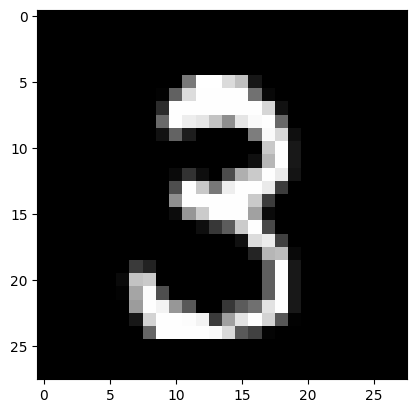

The associated digit is: 3.0


In [39]:
import matplotlib.pyplot as plt

def visualize(X, idx):
    # Visualize the image of index 'idx' from the dataset 'X'

    # Load an image in memory
    img = X[idx]
    
    # Reshape it
    img = np.reshape(img, (28, 28))

    # Visualize
    plt.imshow(img, cmap='gray')
    plt.show()

# Visualize image number 10 and the corresponding digit.
idx = 10
visualize(X, idx)
print(f"The associated digit is: {Y[idx]}")

### Filtering digits
To simplify the dimensionality reduction task provided by PCA, we can consider filtering out just a few digits from MNIST dataset. This can be simply done by defining a boolean `ndarray` whose value in position $i$ is `True` if and only if the digit in the corresponding index represents one of the selected digit.

In the following, we show how this can be implemented for the digits $3$ and $4$.

Final shape of X: (8423, 784). Final shape of Y: (8423,)


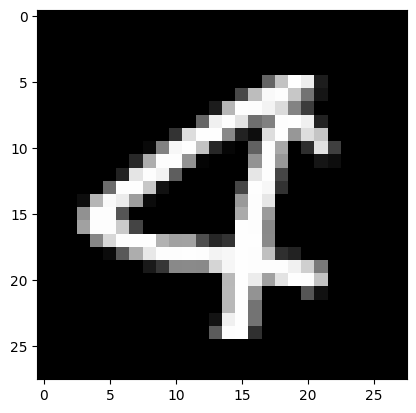

In [40]:
# Define the boolean array to filter out digits
filter_3or4 = (Y==3) | (Y==4)

# Define the filtered data
X_filtered = X[filter_3or4]
Y_filtered = Y[filter_3or4]

# Print final shape of data
print(f"Final shape of X: {X_filtered.shape}. Final shape of Y: {Y_filtered.shape}")

# Memorize the shape of X in the variables N and d
N, d = X_filtered.shape

# Visualize a sample just to prove that we only have 3 or 4
visualize(X_filtered, 10)

### Splitting the dataset
Before implementing the algorithm performing PCA, you should **always** split the dataset into training and test set. Remember that to avoid any possible bias in the splitted dataset, the division should be done **randomly**, keeping a proportion of *at least* $80\%$ for the training set and $20\%$ for the test set. 

The algorithm we consider to split the data is conceptually very similar to the one we used for sample batches in Stochastic Gradient Descent.

In [41]:
def split_data(X, Y, N_train):
    N, d = X.shape

    # Sample indices and shuffle them
    idx = np.arange(N)
    np.random.shuffle(idx)

    # Extract the set of index 
    train_idx = idx[:N_train] # for the training set
    test_idx = idx[N_train:]  # and for the test set
    
    # Training split
    X_train = X[train_idx]
    Y_train = Y[train_idx]
    
    # Test split
    X_test = X[test_idx]
    Y_test = Y[test_idx]

    return (X_train, Y_train), (X_test, Y_test)

# Split
N_train = int(N * 0.8)
(X_train, Y_train), (X_test, Y_test) = split_data(X_filtered, Y_filtered, N_train)

print(X_train.shape, X_test.shape)

(6738, 784) (1685, 784)


Now the dataset $(X, Y)$ is divided into the train and test components, and we can implement the PCA algorithm on $X_{train}$. **Remember to never access $X_{test}$ during training.**

In [42]:
# Compute centroid
cX = np.mean(X, axis=0)

# Make it a row vector
cX = np.reshape(cX, (1, d))
print(f"Shape of c(X): {cX.shape}.")

# Center the data (row-by-row)
Xc = X - cX

# Compute SVD decomposition
U, s, VT = np.linalg.svd(Xc, full_matrices=False)

# Given k, compute reduced SVD
k = 2
VTk = VT[:k]

# Define projection matrix
P = VTk

# Project X_train -> Z_train
Z_train = X_train @ P.T
print(f"Shape of projected data: {Z_train.shape}.")

Shape of c(X): (1, 784).
Shape of projected data: (6738, 2).


```{warning}
When the full SVD decomposition is not required (as it is the case for PCA), one can compute the (reduced) SVD decomposition of a matrix $X$ as `np.linalg.svd(X, full_matrices=False)`, to save computation time.
```

### Visualizing clusters
When $k=2$, it is possible to visualize clusters in Python. In particular, we want to plot the datapoints, with the color of the corresponding class, to check how well the clustering algorithm performed in 2-dimensions. This can be done by the `matplotlib` function `plt.scatter`. In particular, if $Z_{train} = [z^{(1)}; z^{(2)}; \dots z^{(N)}] \in \mathbb{R}^{N \times 2}$ is the projected dataset and $Y_{train} \in \mathbb{R}^N$ is the vector of the corresponding classes, then the $Z_{train}$ can be visualized as:

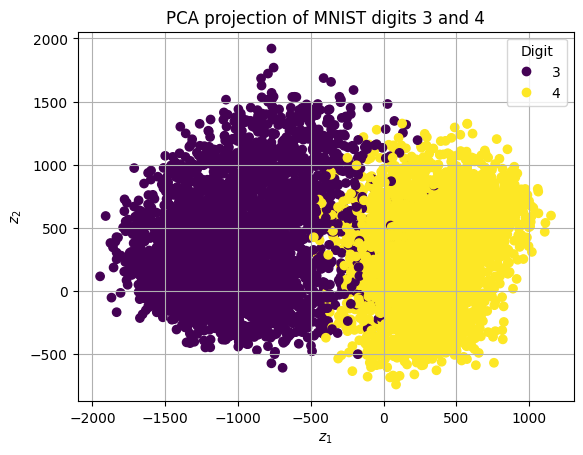

In [43]:
# Visualize the clusters
ax = plt.scatter(Z_train[:, 0], Z_train[:, 1], c=Y_train)
plt.legend(*ax.legend_elements(), title="Digit") # Add to the legend the list of digits
plt.xlabel(r"$z_1$")
plt.ylabel(r"$z_2$")
plt.title("PCA projection of MNIST digits 3 and 4")
plt.grid()
plt.show()

> **Exercise:** Try different combination of digits other than 3 or 4. What do you observe comparing the separation of the clusters and the similarity of the digits?

> **Exercise:** Keeping the projection matrix $P$ **fixed**, try to project the test set $X_{test}$ as $Z_{test} = X_{test} P^T$. Visualize $Z_{test}$ on the same scatterplot of the projection of the training set. What do you observe? What if the digits in $X_{test}$ are different from the digits in $X_{train}$?